**Derivative Pricing Project**

*FINA60211A.A2023*


Nasim Siami


11306186


In [ ]:
# Importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from linearmodels import PanelOLS
#import statsmodels.api as sm
import matplotlib.ticker as ticker
from scipy.stats import norm
from tabulate import tabulate

In [2]:

#derivative = pd.read_csv('theme9b.csv')


**Question 1**

In [3]:

#Function for BS Put 
def BSPut(x0, K, sigma, r, T, rf):
    d1 = (np.log(x0 / K) + (r - rf + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - x0 * np.exp(-rf * T) * norm.cdf(-d1)
    
    return put_price



In [4]:
# Time points
T_values = [1/12 + i/12 for i in range(12)]
# Round each element to 3 decimals
rounded_T_values = [round(value, 3) for value in T_values]

# Print the result
print(rounded_T_values)

[0.083, 0.167, 0.25, 0.333, 0.417, 0.5, 0.583, 0.667, 0.75, 0.833, 0.917, 1.0]


In [5]:
# Parameters
x0 = 1.33
K = 1.33
sigma = 0.1
r = 0.02
rf = 0.01
N = 12
h = 0.0833
ntraj = 20000

In [6]:

# Individual put price European (each for 100 CAD/USD)

individual_put_prices = [100 * BSPut(x0, K, sigma, r, T, rf) for T in T_values]
rounded_individual_put_prices = [round(price, 4) for price in individual_put_prices]


In [7]:
individual_put_prices

[1.475014185089174,
 2.0518233045935252,
 2.480437248472267,
 2.8321991624853715,
 3.134769461888287,
 3.40234697471693,
 3.643373975038744,
 3.8633559233680725,
 4.066120274244033,
 4.254456200096524,
 4.4304711245432005,
 4.595803717392877]

In [8]:
# Total cost of European puts
total_cost_european_puts = sum(individual_put_prices)
total_cost_european_puts

40.230171551929004

In [9]:
#Function for Asian_put_option_price
def simulate_paths(x0, r, sigma, T, ntraj, N):
    paths = np.zeros((ntraj, N + 1))
    paths[:, 0] = x0

    for i in range(1, N + 1):
        dW = np.random.normal(0, np.sqrt(h), size=ntraj)
        paths[:, i] = paths[:, i - 1] * np.exp((r- rf- 0.5 * sigma**2) * h + sigma * dW)

    return paths

def asian_put_option_price(x0, K, sigma, r, rf, T, ntraj, N):
    paths = simulate_paths(x0, r, sigma, T, ntraj, N)
    
    asian_avg = np.mean(paths[:, 1:], axis=1)
    payoff = np.maximum(K - asian_avg, 0)
    
    discount_factor = np.exp(-r * T)
    option_price = discount_factor * np.mean(payoff)
    return option_price

# Parameters
x0 = 1.33
K = 1.33
sigma = 0.1
r = 0.02
rf = 0.01
T = 1
N = 12
h = T / N
ntraj = 20000

# Calculate Asian put option price
asian_put_price  =  asian_put_option_price(x0, K, sigma, r, rf, T, ntraj, N)
asian_put_price_all=12*100*asian_put_option_price(x0, K, sigma, r, rf, T, ntraj, N)
print("Estimated Asian Put Option Price (for 12 x 100 CAD/USD):",(asian_put_price_all))



Estimated Asian Put Option Price (for 12 x 100 CAD/USD): 33.70543435787395


In [10]:
#part 1)A
print("Individual put prices for European options:", individual_put_prices)
print("Individual put prices for European options:", rounded_individual_put_prices)
print("Total cost of European puts:", round(total_cost_european_puts,2))
print("Cost of an Asian put (for 12 x 100 CAD/USD):",  round(asian_put_price_all, 2))
print("tVALUES:",  round)


Individual put prices for European options: [1.475014185089174, 2.0518233045935252, 2.480437248472267, 2.8321991624853715, 3.134769461888287, 3.40234697471693, 3.643373975038744, 3.8633559233680725, 4.066120274244033, 4.254456200096524, 4.4304711245432005, 4.595803717392877]
Individual put prices for European options: [1.475, 2.0518, 2.4804, 2.8322, 3.1348, 3.4023, 3.6434, 3.8634, 4.0661, 4.2545, 4.4305, 4.5958]
Total cost of European puts: 40.23
Cost of an Asian put (for 12 x 100 CAD/USD): 33.71
tVALUES: <built-in function round>


In [11]:
# Create a table
table_data = [
    ["Individual put prices for European options", rounded_individual_put_prices],
    ["Total cost of European puts", round(total_cost_european_puts, 2)],
    ["Cost of an Asian put (for 12 x 100 CAD/USD)", round(asian_put_price_all, 2)],
    
]

# Display the table
table = tabulate(table_data, headers=["Description", "Values"], tablefmt="fancy_grid")
print(table)

╒═════════════════════════════════════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Description                                 │ Values                                                                                          │
╞═════════════════════════════════════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════╡
│ Individual put prices for European options  │ [1.475, 2.0518, 2.4804, 2.8322, 3.1348, 3.4023, 3.6434, 3.8634, 4.0661, 4.2545, 4.4305, 4.5958] │
├─────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Total cost of European puts                 │ 40.23                                                                                           │
├─────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────

**Question 1- Second part**

In [12]:

#again define the function so we have array of discounted cash flows for getting the variance !
def asian_put_option_price_for_var(x0, K, sigma, r, T, ntraj, N):
    paths = simulate_paths(x0, r, sigma, T, ntraj, N)

    asian_avg = np.mean(paths[:, 1:], axis=1)
    discounted_cash_flows = np.exp(-r * T) * np.maximum(K - paths[:, -1], 0)

    return discounted_cash_flows

# Parameters
x0 = 1.33
K = 1.33
sigma = 0.1
r = 0.02
T = 1
N = 12
h = T / N
ntraj = 20000

# Calculate discounted cash flows
discounted_cash_flows = asian_put_option_price_for_var(x0, K, sigma, r, T, ntraj, N)
Variance=np.var(discounted_cash_flows)
#chenking if we im geeting same answer with slides formule 
# def calculate_variance(data):
#     mean = np.mean(data)
#     variance = np.mean((data - mean) ** 2)
#     return variance
# data = discounted_cash_flows
# result = calculate_variance(data)
print(f"Sample Variance: {Variance}")


Sample Variance: 0.004614465366284417


In [13]:

Adjustedvar=np.sqrt(Variance/ntraj)
Adjustedvar


0.00048033661979305807

In [14]:
asian_put_price_all

33.70543435787395

In [15]:
confidence_interval_lower =( asian_put_price - 1.96 * (Adjustedvar))*12*100

confidence_interval_upper = (asian_put_price + 1.96 *(Adjustedvar))*12*100
print("confidence_interval_lower:", confidence_interval_lower)
print("confidence_interval_upper:", confidence_interval_upper)

confidence_interval_lower: 33.05773538688499
confidence_interval_upper: 35.31723884639154


In [16]:
# Create a table
table_data = [
    ["confidence_interval_lower", confidence_interval_lower],
    ["Asian_put_price", asian_put_price_all],
    ["confidence_interval_upper", confidence_interval_upper],
    
]

# Display the table
table = tabulate(table_data, headers=["Description", "Values"], tablefmt="fancy_grid")
print(table)

╒═══════════════════════════╤══════════╕
│ Description               │   Values │
╞═══════════════════════════╪══════════╡
│ confidence_interval_lower │  33.0577 │
├───────────────────────────┼──────────┤
│ Asian_put_price           │  33.7054 │
├───────────────────────────┼──────────┤
│ confidence_interval_upper │  35.3172 │
╘═══════════════════════════╧══════════╛


**Final table for Q1**

In [17]:

# Round confidence intervals to 3 decimals
confidence_interval_lower = round(confidence_interval_lower, 3)
confidence_interval_upper = round(confidence_interval_upper, 3)

# Create a table
table_data = [
    ["Total cost of European puts", round(total_cost_european_puts, 2)],
    ["Cost of an Asian put ", round(asian_put_price_all, 2)],
    ["95% Confidence Interval", (confidence_interval_lower, confidence_interval_upper)],
]

# Display the table
table = tabulate(table_data, headers=["Description", "Values"], tablefmt="fancy_grid")
print(table)

╒═════════════════════════════╤══════════════════╕
│ Description                 │ Values           │
╞═════════════════════════════╪══════════════════╡
│ Total cost of European puts │ 40.23            │
├─────────────────────────────┼──────────────────┤
│ Cost of an Asian put        │ 33.71            │
├─────────────────────────────┼──────────────────┤
│ 95% Confidence Interval     │ (33.058, 35.317) │
╘═════════════════════════════╧══════════════════╛


**Question 2**
Question2_ Part1 

The hedged revenues with the European options

In [18]:
def simulate_paths_vectorized(x0, r, sigma, T, ntraj, N, h):
    paths = np.zeros((ntraj, N + 1))
    paths[:, 0] = x0

    dW = np.random.normal(0, np.sqrt(h), size=(ntraj, N))
    for i in range(1, N + 1):
        paths[:, i] = paths[:, i - 1] * np.exp((r - rf - 0.5 * sigma**2) * h + sigma * dW[:, i - 1])

    return paths

def asian_put_option_price_vectorized(x0, K, sigma, r, rf, T, ntraj, N, h):
    paths = simulate_paths_vectorized(x0, r, sigma, T, ntraj, N, h)
    
    asian_avg = np.mean(paths[:, 1:], axis=1)
    payoff = np.maximum(K - asian_avg, 0)
    
    discount_factor = np.exp(-r * T)
    option_price = discount_factor * np.mean(payoff)
    
    return option_price

# Parameters
x0 = 1.33
K = 1.33
sigma = 0.1
r = 0.02
rf = 0.01
T = 1
N = 12
h = T / N
ntraj = 20000

# Calculate Asian put option price
asian_put_price_vectorized = 12 * 100 * asian_put_option_price_vectorized(x0, K, sigma, r, rf, T, ntraj, N, h)

print("Estimated Asian Put Option Price:", asian_put_price_vectorized)

Estimated Asian Put Option Price: 34.74774683261159


In [19]:
realized_exchange_rate = np.array([1.3059, 1.2863, 1.3069, 1.2814, 1.2850, 1.2720, 1.2686, 1.2578, 1.2193, 1.2497, 1.2740, 1.2090])

# Calculate profit for each put
profits = 100 * np.maximum(K - realized_exchange_rate, 0) - individual_put_prices

rounded_profits = np.round(profits, 2)

# Displaying the results
for i, profit in enumerate(rounded_profits):
    print(f"Profit for put option {i + 1}: {profit}")

Profit for put option 1: 0.93
Profit for put option 2: 2.32
Profit for put option 3: -0.17
Profit for put option 4: 2.03
Profit for put option 5: 1.37
Profit for put option 6: 2.4
Profit for put option 7: 2.5
Profit for put option 8: 3.36
Profit for put option 9: 7.0
Profit for put option 10: 3.78
Profit for put option 11: 1.17
Profit for put option 12: 7.5


In [20]:
profits = [0.93, 2.32, -0.17, 2.03, 1.37, 2.4, 2.5, 3.36, 7.0, 3.78, 1.17, 7.5]

# Create a table
table_data = list(zip(["T"] + rounded_T_values, ["Profits"] + profits))

# Display the table
table = tabulate(table_data,  tablefmt="fancy_grid")
print(table)

╒═══════╤═════════╕
│ T     │ Profits │
├───────┼─────────┤
│ 0.083 │ 0.93    │
├───────┼─────────┤
│ 0.167 │ 2.32    │
├───────┼─────────┤
│ 0.25  │ -0.17   │
├───────┼─────────┤
│ 0.333 │ 2.03    │
├───────┼─────────┤
│ 0.417 │ 1.37    │
├───────┼─────────┤
│ 0.5   │ 2.4     │
├───────┼─────────┤
│ 0.583 │ 2.5     │
├───────┼─────────┤
│ 0.667 │ 3.36    │
├───────┼─────────┤
│ 0.75  │ 7.0     │
├───────┼─────────┤
│ 0.833 │ 3.78    │
├───────┼─────────┤
│ 0.917 │ 1.17    │
├───────┼─────────┤
│ 1.0   │ 7.5     │
╘═══════╧═════════╛


In [21]:
total_profit = np.sum(profits)
print(f"\nTotal Profit: {total_profit:.2f}")


Total Profit: 34.19


In [22]:
# Calculate and print the average

Mean_of_the_realized_exchange = np.mean(realized_exchange_rate)
print(f"Mean_of_the_realized_exchange: {Mean_of_the_realized_exchange:.4f}")

Mean_of_the_realized_exchange: 1.2680


In [23]:
Inflows_without_hedging=12*100*Mean_of_the_realized_exchange
Inflows_without_hedging
rounded_inflows_without_hedging = round(Inflows_without_hedging, 1)

# Display the result
print(f"Inflows without hedging: {rounded_inflows_without_hedging}")

Inflows without hedging: 1521.6


In [24]:
#12 European puts 
Inflows_with_hedging=rounded_inflows_without_hedging+total_profit
rounded_Inflows_with_hedging_European = round(Inflows_with_hedging)

# Display the result
print(f"Inflows with hedging_European: {rounded_Inflows_with_hedging_European}")

Inflows with hedging_European: 1556


In [25]:
Profit_for_the_put = 12 * 100 * np.maximum(K - Mean_of_the_realized_exchange, 0) - asian_put_price

# Display the result
print(f"Profit_for_the_put: {Profit_for_the_put:.2f}")

Profit_for_the_put: 74.38


Question2_Part2 

The hedged revenues with the Asian option


In [26]:
#1 Asian put
Inflows_with_hedging_Asian=Profit_for_the_put+rounded_inflows_without_hedging
Inflows_with_hedging_Asian = round(Inflows_with_hedging_Asian)
# Display the result
print(f"Inflows with hedging_European: {Inflows_with_hedging_Asian}")

Inflows with hedging_European: 1596


Question2_ Part3 

The difference between these quantities (Asian - European)

In [27]:
Difference=Inflows_with_hedging_Asian-rounded_Inflows_with_hedging_European
Difference

40

In [28]:
# Create a table
table_data = [
    ["Hedged Revenues with European Options", rounded_Inflows_with_hedging_European],
    ["Hedged Revenues with Asian Option", Inflows_with_hedging_Asian],
    ["Difference (Asian - European)", Difference],
]

# Display the table
table = tabulate(table_data, headers=["Description", "Values"], tablefmt="fancy_grid")
print(table)

╒═══════════════════════════════════════╤══════════╕
│ Description                           │   Values │
╞═══════════════════════════════════════╪══════════╡
│ Hedged Revenues with European Options │     1556 │
├───────────────────────────────────────┼──────────┤
│ Hedged Revenues with Asian Option     │     1596 │
├───────────────────────────────────────┼──────────┤
│ Difference (Asian - European)         │       40 │
╘═══════════════════════════════════════╧══════════╛


Question 3 

Q3-PartA

In [29]:
def simulate_physical_paths(x0, sigma, N, h, ntraj, seed=None):
    if seed is not None:
        np.random.seed(seed)  # Set the seed if provided

    paths = np.zeros((ntraj, N + 1))
    paths[:, 0] = x0

    for i in range(1, N + 1):
        dW = np.random.normal(0, np.sqrt(h), size=(ntraj,))
        paths[:, i] = paths[:, i - 1] * np.exp(-0.5 * sigma**2 * h + sigma * dW)

    return paths

#  input
x0 = 1.33
sigma = 0.1
N = 12
h = 1 / N
ntraj = 10000

# Simulate physical paths for 10,000 trajectories without a specified seed initially
physical_paths = simulate_physical_paths(x0, sigma, N, h, ntraj)
# Display the first few paths for illustration
print("First few paths (before setting seed):")
print(physical_paths[:5, :])


First few paths (before setting seed):
[[1.33       1.36685175 1.36745284 1.36372856 1.367216   1.42685175
  1.47385188 1.49029462 1.46697379 1.48339253 1.44288987 1.49241937
  1.47815651]
 [1.33       1.3199215  1.27443109 1.33466552 1.30913731 1.33118782
  1.31065311 1.29536922 1.3293746  1.39114461 1.42716993 1.41762462
  1.43308554]
 [1.33       1.32338299 1.35243118 1.35796337 1.32704987 1.36135338
  1.27737247 1.23607772 1.21531479 1.28041455 1.27556306 1.27754874
  1.32451258]
 [1.33       1.37732389 1.41474401 1.38107912 1.41188888 1.42582852
  1.44869979 1.45281607 1.46134854 1.45431021 1.39192454 1.4051567
  1.39153763]
 [1.33       1.35804123 1.34495308 1.32159895 1.34783082 1.34394975
  1.36802328 1.39393528 1.3793266  1.38500804 1.35818935 1.27737535
  1.23611532]]


In [30]:
seed = 0  # You can use any integer as the seed value
np.random.seed(seed)

# Example: Simulate additional paths with the same seed
additional_paths = simulate_physical_paths(x0, sigma, N, h, ntraj, seed)

# Display the first few additional paths for illustration
print("\nFirst few additional paths (with seed):")
print(additional_paths[:5, :])


First few additional paths (with seed):
[[1.33       1.39889981 1.39018217 1.40290591 1.41743035 1.33969289
  1.34169021 1.30005187 1.231523   1.25149018 1.25525632 1.23733156
  1.27329844]
 [1.33       1.34489214 1.31238205 1.31181716 1.32285861 1.35081365
  1.41816631 1.38352304 1.45184003 1.4890058  1.56579164 1.62443144
  1.55577551]
 [1.33       1.36754342 1.43712425 1.47085575 1.49179565 1.55243542
  1.48092297 1.4693301  1.43675799 1.42022981 1.41599901 1.41011231
  1.37122071]
 [1.33       1.41828911 1.42552218 1.44265185 1.4476942  1.41350048
  1.38879527 1.41704801 1.42294261 1.40899178 1.37536652 1.36695489
  1.38871866]
 [1.33       1.40308591 1.39532089 1.29748143 1.32164972 1.29023803
  1.21322643 1.23197956 1.2219591  1.26340434 1.2094357  1.19731482
  1.18175136]]


In [31]:
num_rows, num_columns = physical_paths.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 10000
Number of columns: 13


In [32]:
# Exclude the first column and keep the last 12 columns for further calculations
simulated_paths = additional_paths[:, -12:]
simulated_paths


array([[1.39889981, 1.39018217, 1.40290591, ..., 1.25525632, 1.23733156,
        1.27329844],
       [1.34489214, 1.31238205, 1.31181716, ..., 1.56579164, 1.62443144,
        1.55577551],
       [1.36754342, 1.43712425, 1.47085575, ..., 1.41599901, 1.41011231,
        1.37122071],
       ...,
       [1.34943109, 1.3466412 , 1.28861763, ..., 1.35608611, 1.38371718,
        1.48801179],
       [1.32818313, 1.28765992, 1.32393577, ..., 1.32306932, 1.3053694 ,
        1.30348076],
       [1.38020981, 1.36669142, 1.41654288, ..., 1.21994572, 1.30072417,
        1.30669933]])

Q3-PartB

In [33]:

# Calculate the average exchange rate for each path
average_exchange_rates = np.mean(simulated_paths, axis=1)
average_exchange_rates.shape
average_exchange_rates



array([1.31997939, 1.42760812, 1.44369395, ..., 1.3554737 , 1.31526663,
       1.32048772])

Q3-Partc

In [34]:

revenues_without_hedging = 12 * 100 * average_exchange_rates
# Display the revenues without hedging for the first few paths for illustration
print("Revenues Without Hedging for the first few paths:")
print(revenues_without_hedging)

Revenues Without Hedging for the first few paths:
[1583.97527184 1713.12973894 1732.43274076 ... 1626.56843705 1578.31995649
 1584.58525829]


Q3-pardD

In [35]:
#Use same notation as Excel File !

Q4 = simulated_paths  # Use the entire matrix of paths for further calculations

# L4 array which is the Individualputprice European

L4 = np.array([1.4750, 2.0518, 2.4804, 2.8322, 3.1348, 3.4023, 3.6434, 3.8634, 4.0661, 4.2545, 4.4305, 4.5958])

# d) Calculate the hedged revenues with European put options for each element in the matrix
hedged_revenues = 100 * np.maximum(K - Q4, 0) - L4
hedged_revenues

sum_hedged_revenues = np.sum(hedged_revenues, axis=1)
sum_hedged_revenues

Inflows_with_hedging_European = sum_hedged_revenues + revenues_without_hedging


# Display the result or use it as needed
print("Total Sum of Hedged Revenues and Revenues Without Hedging:", Inflows_with_hedging_European)



Total Sum of Hedged Revenues and Revenues Without Hedging: [1586.84993401 1677.19375653 1692.20254076 ... 1592.99869675 1562.08873626
 1576.79243605]


Q3-part E

In [36]:
def simulate_paths_vectorized1(x0, r, sigma, T, ntraj, N, h):
    paths = np.zeros((ntraj, N + 1))
    paths[:, 0] = x0

    dW = np.random.normal(0, np.sqrt(h), size=(ntraj, N))
    for i in range(1, N + 1):
        paths[:, i] = paths[:, i - 1] * np.exp((r - rf - 0.5 * sigma**2) * h + sigma * dW[:, i - 1])

    return paths

def asian_put_option_price_vectorized1(x0, K, sigma, r, rf, T, ntraj, N, h):
    paths = simulate_paths_vectorized1(x0, r, sigma, T, ntraj, N, h)
    
    asian_avg = np.mean(paths[:, 1:], axis=1)
    payoff = np.maximum(K - asian_avg, 0)
    
    discount_factor = np.exp(-r * T)
    option_price = discount_factor * np.mean(payoff)
    
    return option_price

# Parameters
x0 = 1.33
K = 1.33
sigma = 0.1
r = 0.02
rf = 0.01
T = 1
N = 12
h = T / N
ntraj = 10000

# Calculate Asian put option price using vectorized code
asian_put_price_vectorized_3 = 12 * 100 * asian_put_option_price_vectorized1(x0, K, sigma, r, rf, T, ntraj, N, h)

print("Estimated Asian Put Option Price (for 12 x 100 CAD/USD):", asian_put_price_vectorized_3)

profit_for_the_put = 12 * 100 * np.maximum(K - average_exchange_rates, 0) - asian_put_price_vectorized_3  

# Display the results 

print("Profit for the Put:", profit_for_the_put)

Inflows_with_hedging_Asian=profit_for_the_put+revenues_without_hedging

Inflows_with_hedging_Asian

Estimated Asian Put Option Price (for 12 x 100 CAD/USD): 34.06617841403517
Profit for the Put: [-22.04145026 -34.06617841 -34.06617841 ... -34.06617841 -16.3861349
 -22.6514367 ]


array([1561.93382159, 1679.06356052, 1698.36656235, ..., 1592.50225863,
       1561.93382159, 1561.93382159])

Q3-Part F

In [37]:
difference_revenues = Inflows_with_hedging_Asian - Inflows_with_hedging_European

# Display the results or use them as needed
print("Difference between Asian and European Hedged Revenues:",difference_revenues)


Difference between Asian and European Hedged Revenues: [-24.91611242   1.86980399   6.16402159 ...  -0.49643812  -0.15491467
 -14.85861446]


Question3 _ f

Mean Difference: 0.521846859865626
Median Difference: 3.754148155247094
Standard Deviation of Difference: 7.482372447769909
Minimum Difference: -48.40511031917367
Maximum Difference: 6.164021585965429
5th Percentile of Difference: -15.148060912293612
95th Percentile of Difference: 6.164021585964974
Proportion of Negative Differences: 0.3324


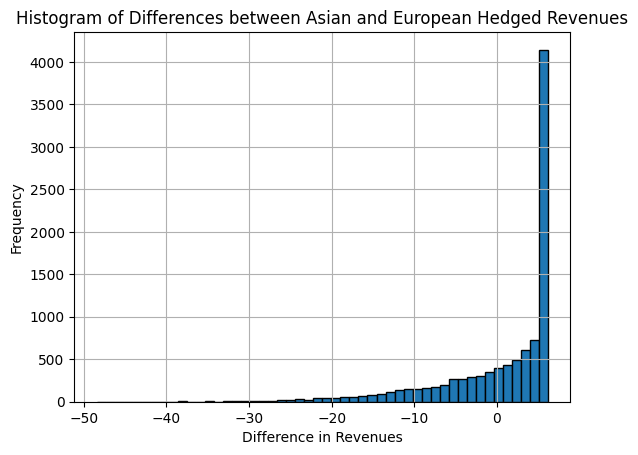

In [38]:

# Display statistics
mean_difference = np.mean(difference_revenues)
median_difference = np.median(difference_revenues)
std_dev_difference = np.std(difference_revenues)
min_difference = np.min(difference_revenues)
max_difference = np.max(difference_revenues)
percentile_5th = np.percentile(difference_revenues, 5)
percentile_95th = np.percentile(difference_revenues, 95)

# Calculate the proportion of differences that are negative
proportion_negative = np.sum(difference_revenues < 0) / ntraj

# Display the results
print("Mean Difference:", mean_difference)
print("Median Difference:", median_difference)
print("Standard Deviation of Difference:", std_dev_difference)
print("Minimum Difference:", min_difference)
print("Maximum Difference:", max_difference)
print("5th Percentile of Difference:", percentile_5th)
print("95th Percentile of Difference:", percentile_95th)
print("Proportion of Negative Differences:", proportion_negative)

plt.hist(difference_revenues, bins=50, edgecolor='black')
plt.title('Histogram of Differences between Asian and European Hedged Revenues')
plt.xlabel('Difference in Revenues')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [39]:
header = f"Statistics for sigma = 0.1"
mean_difference_table = [
    ["Mean Difference", mean_difference],
    ["Median Difference", median_difference],
    ["Standard Deviation of Difference", std_dev_difference],
    ["Minimum Difference", min_difference],
    ["Maximum Difference", max_difference],
    ["5th Percentile of Difference", percentile_5th],
    ["95th Percentile of Difference", percentile_95th],
    ["Proportion of Negative Differences", proportion_negative],
]

# Display the mean difference table with header
mean_difference_table_str = tabulate(mean_difference_table, headers=["Description", "Values"], tablefmt="fancy_grid")
print(f"\n{header}\n{mean_difference_table_str}")


Statistics for sigma = 0.1
╒════════════════════════════════════╤════════════╕
│ Description                        │     Values │
╞════════════════════════════════════╪════════════╡
│ Mean Difference                    │   0.521847 │
├────────────────────────────────────┼────────────┤
│ Median Difference                  │   3.75415  │
├────────────────────────────────────┼────────────┤
│ Standard Deviation of Difference   │   7.48237  │
├────────────────────────────────────┼────────────┤
│ Minimum Difference                 │ -48.4051   │
├────────────────────────────────────┼────────────┤
│ Maximum Difference                 │   6.16402  │
├────────────────────────────────────┼────────────┤
│ 5th Percentile of Difference       │ -15.1481   │
├────────────────────────────────────┼────────────┤
│ 95th Percentile of Difference      │   6.16402  │
├────────────────────────────────────┼────────────┤
│ Proportion of Negative Differences │   0.3324   │
╘═══════════════════════════════════

**Advantages of Asian Put Hedging Strategy:**

Mean and Median Differences: The mean and median differences between revenues with Asian put hedging and European put hedging are both positive. This indicates, on average, the Asian put hedging strategy tends to outperform the European put hedging strategy. This is a positive sign for considering the Asian put option.

Lower Proportion of Negative Differences: The proportion of negative differences is relatively low at 33.24%. This implies that the Asian put option is more likely to provide positive returns compared to the European put option in the majority of cases.


Maximum Difference: The maximum difference is positive, showcasing that in the best-case scenario, the Asian put hedging strategy can provide higher revenues compared to the European put strategy.

Median Difference:The median difference being positive suggests that, on average, the Asian put hedging strategy tends to outperform the European put strategy. This is generally seen as an advantage.
Consideration:
The magnitude of the median difference (3.75%) should be evaluated in the context of the investor's objectives and risk tolerance. If this level of improvement aligns with the investor's expectations and risk appetite, it could be viewed positively.

**Disadvantages of Asian Put Hedging Strategy:**

Higher Standard Deviation: The standard deviation of the difference between Asian and European put hedging revenues is relatively high at 7.48%. This indicates greater variability in outcomes with the Asian put option, suggesting that while it may outperform on average, there is also higher uncertainty.

Minimum Difference: The minimum difference is negative (-48.41%), signifying that there are instances where the Asian put hedging strategy may result in significantly lower revenues compared to the European put strategy. This highlights a potential for larger losses in certain scenarios.

Downside Risk:The 5th percentile of the difference being negative at -15.15% implies that in the worst 5% of scenarios, the Asian put hedging strategy may underperform the European put strategy. This signals a potential downside risk in a subset of outcomes, which may be a concern for investors seeking consistent performance across various market conditions.

**Mixed Point :**

Complexity and Monitoring: While the Asian put hedging strategy offers advantages in terms of ease of management and potentially lower transaction costs compared to handling multiple European put contracts, it introduces a trade-off in terms of complexity during the construction phase. Constructing a single Asian put contract may require a more intricate process compared to handling twelve European put options.

**Conclusion and Recommendations:**


*Conclusion*


In conclusion, the simulation results highlight both advantages and disadvantages associated with the Asian put hedging strategy. On the positive side, the strategy demonstrates a tendency to outperform the European put hedging strategy on average, as indicated by positive mean and median differences. The lower proportion of negative differences and the positive maximum difference further support the potential benefits of adopting the Asian put option.

However, it's crucial to acknowledge the presence of notable challenges. The higher standard deviation suggests increased variability in outcomes, introducing a level of uncertainty. The minimum difference being negative and the 5th percentile indicating potential downside risk in specific scenarios underscore the importance of carefully evaluating the strategy's performance under various market conditions.

While the Asian put hedging strategy has the potential to significantly enhance returns in favorable scenarios, it should be noted that in adverse scenarios, it may have a substantial negative impact. The strategy's success is intricately tied to market conditions, making it imperative for investors to recognize its dual nature—offering increased gains on the upside but carrying the risk of substantial losses in unfavorable situations.

*Recommendation*

Careful consideration should be given to the specific risk tolerance and financial goals of the company. The strategy's effectiveness appears to be path-dependent and might not be suitable for all scenarios.
Regular monitoring and reassessment of the hedging strategy are crucial, given the wide range of potential outcomes.
It may be advisable to combine multiple hedging strategies or instruments to create a more robust risk management approach.

Risk Tolerance Assessment: Before embracing the Asian put hedging strategy, it is imperative for investors to conduct a comprehensive assessment of their risk tolerance. The strategy's higher standard deviation, indicative of increased volatility, coupled with the potential for negative outcomes in specific scenarios, underscores the need for a clear understanding of the investor's capacity to tolerate market fluctuations and potential losses.

Monitoring and Risk Management: Given the complexity introduced by the averaging mechanism, a robust monitoring and risk management strategy is essential. Regularly assess the market conditions and adjust the hedging strategy accordingly to mitigate potential downsides and capitalize on favorable scenarios.

Diversification of Hedging Strategies: Consider diversifying hedging strategies to mitigate risk. While the Asian put option may offer advantages, having a diversified portfolio of hedging instruments can provide a more comprehensive risk management approach. 

**Question 4**

**Question 4- Case 2**

In [40]:
#Same simulation but for sigma = 0.2 do the exat same steps ! 
def simulate_physical_paths1(x0, sigma2, N, h, ntraj, seed=None):
    if seed is not None:
        np.random.seed(seed)  # Set the seed if provided
    
    paths = np.zeros((ntraj, N + 1))
    paths[:, 0] = x0

    for i in range(1, N + 1):
        dW = np.random.normal(0, np.sqrt(h), size=(ntraj,))
        paths[:, i] = paths[:, i - 1] * np.exp(-0.5 * sigma2**2 * h + sigma2 * dW)

    return paths

x0 = 1.33
sigma2 = 0.2
N = 12
h = 1 / N
ntraj = 10000

physical_paths2 = simulate_physical_paths1(x0, sigma2, N, h, ntraj)
seed=0
np.random.seed(seed)
additional_paths2 = simulate_physical_paths1(x0, sigma2, N, h, ntraj, seed)

simulated_paths2 = additional_paths2[:, -12:]
average_exchange_rates2 = np.mean(simulated_paths2, axis=1)
revenues_without_hedging2 = 12 * 100 * average_exchange_rates2
Q42 = simulated_paths2  # Use the entire matrix of paths for further calculations  based on new simulation with different sigma

# L4 array same as before as it is the initial price 
L4 = np.array([1.4750, 2.0518, 2.4804, 2.8322, 3.1348, 3.4023, 3.6434, 3.8634, 4.0661, 4.2545, 4.4305, 4.5958])

# d) Calculate the hedged revenues with European put options for each element in the matrix
hedged_revenues2 = 100 * np.maximum(K - Q42, 0) - L4
sum_hedged_revenues2 = np.sum(hedged_revenues2, axis=1)
Inflows_with_hedging_European2 = sum_hedged_revenues2 + revenues_without_hedging2

def simulate_paths_vectorized(x0, r, sigma, T, ntraj, N, h):
    paths = np.zeros((ntraj, N + 1))
    paths[:, 0] = x0

    dW = np.random.normal(0, np.sqrt(h), size=(ntraj, N))
    for i in range(1, N + 1):
        paths[:, i] = paths[:, i - 1] * np.exp((r - rf - 0.5 * sigma**2) * h + sigma * dW[:, i - 1])

    return paths

def asian_put_option_price_vectorized(x0, K, sigma, r, rf, T, ntraj, N, h):
    paths = simulate_paths_vectorized(x0, r, sigma, T, ntraj, N, h)
    
    asian_avg = np.mean(paths[:, 1:], axis=1)
    payoff = np.maximum(K - asian_avg, 0)
    
    discount_factor = np.exp(-r * T)
    option_price = discount_factor * np.mean(payoff)
    
    return option_price

# Parameters
x0 = 1.33
K = 1.33
sigma = 0.1
r = 0.02
rf = 0.01
T = 1
N = 12
h = T / N
ntraj = 10000

# Calculate Asian put option price using vectorized code
asian_put_price_vectorized_2 = 12 * 100 * asian_put_option_price_vectorized(x0, K, sigma, r, rf, T, ntraj, N, h)

profit_for_the_put2 = 12 * 100 * np.maximum(K - average_exchange_rates2, 0) - asian_put_price_vectorized_2  # You need to define N4

Inflows_with_hedging_Asian2=profit_for_the_put2+revenues_without_hedging2
case2 = Inflows_with_hedging_Asian2 - Inflows_with_hedging_European2
mean_difference2 = np.mean(case2)
median_difference2 = np.median(case2)
std_dev_difference2 = np.std(case2)
min_difference2 = np.min(case2)
max_difference2 = np.max(case2)
percentile_5th2 = np.percentile(case2, 5)
percentile_95th2 = np.percentile(case2, 95)


proportion_negative2 = np.sum(case2 < 0) / ntraj

print("Mean Difference:", mean_difference2)
print("Median Difference:", median_difference2)
print("Standard Deviation of Difference:", std_dev_difference2)
print("Minimum Difference:", min_difference2)
print("Maximum Difference:", max_difference2)
print("5th Percentile of Difference:", percentile_5th2)
print("95th Percentile of Difference:", percentile_95th2)
print("Proportion of Negative Differences:", proportion_negative2)


Mean Difference: -5.117792853620067
Median Difference: 1.3931520196258589
Standard Deviation of Difference: 14.958247732406539
Minimum Difference: -103.68566899497932
Maximum Difference: 6.164021585965429
5th Percentile of Difference: -36.58453827084926
95th Percentile of Difference: 6.164021585964974
Proportion of Negative Differences: 0.4625


In [41]:
# Create a table for the second set of difference statistics with a header
header = f"Statistics for sigma = 0.2"
mean_difference_table2 = [
    ["Mean Difference", mean_difference2],
    ["Median Difference", median_difference2],
    ["Standard Deviation of Difference", std_dev_difference2],
    ["Minimum Difference", min_difference2],
    ["Maximum Difference", max_difference2],
    ["5th Percentile of Difference", percentile_5th2],
    ["95th Percentile of Difference", percentile_95th2],
    ["Proportion of Negative Differences", proportion_negative2],
]

# Display the second set of difference statistics table with header
mean_difference_table2_str = tabulate(mean_difference_table2, headers=["Description", "Values"], tablefmt="fancy_grid")
print(f"\n{header}\n{mean_difference_table2_str}")


Statistics for sigma = 0.2
╒════════════════════════════════════╤════════════╕
│ Description                        │     Values │
╞════════════════════════════════════╪════════════╡
│ Mean Difference                    │   -5.11779 │
├────────────────────────────────────┼────────────┤
│ Median Difference                  │    1.39315 │
├────────────────────────────────────┼────────────┤
│ Standard Deviation of Difference   │   14.9582  │
├────────────────────────────────────┼────────────┤
│ Minimum Difference                 │ -103.686   │
├────────────────────────────────────┼────────────┤
│ Maximum Difference                 │    6.16402 │
├────────────────────────────────────┼────────────┤
│ 5th Percentile of Difference       │  -36.5845  │
├────────────────────────────────────┼────────────┤
│ 95th Percentile of Difference      │    6.16402 │
├────────────────────────────────────┼────────────┤
│ Proportion of Negative Differences │    0.4625  │
╘═══════════════════════════════════

In [42]:

#Same simulation but for sigma = 0.05 do the exat same steps!
def simulate_physical_paths3(x0, sigma3, N, h, ntraj, seed=None):
    if seed is not None:
        np.random.seed(seed)  # Set the seed if provided
    
    paths = np.zeros((ntraj, N + 1))
    paths[:, 0] = x0

    for i in range(1, N + 1):
        dW = np.random.normal(0, np.sqrt(h), size=(ntraj,))
        paths[:, i] = paths[:, i - 1] * np.exp(-0.5 * sigma3**2 * h + sigma3 * dW)

    return paths

x0 = 1.33
sigma3 = 0.05
N = 12
h = 1 / N
ntraj = 10000

physical_paths3 = simulate_physical_paths3(x0, sigma3, N, h, ntraj)
seed=0
np.random.seed(seed)
additional_paths3 = simulate_physical_paths3(x0, sigma3, N, h, ntraj, seed)

simulated_paths3 = physical_paths3[:, -12:]
average_exchange_rates3 = np.mean(simulated_paths3, axis=1)
revenues_without_hedging3 = 12 * 100 * average_exchange_rates3
Q43 = simulated_paths3  # Use the entire matrix of paths for further calculations based on new simulation with different sigma 

# L4 array same as befor as it is the initial price !
L4 = np.array([1.4750, 2.0518, 2.4804, 2.8322, 3.1348, 3.4023, 3.6434, 3.8634, 4.0661, 4.2545, 4.4305, 4.5958])

# d) Calculate the hedged revenues with European put options for each element in the matrix
hedged_revenues3 = 100 * np.maximum(K - Q43, 0) - L4
sum_hedged_revenues3 = np.sum(hedged_revenues3, axis=1)
Inflows_with_hedging_European3 = sum_hedged_revenues3 + revenues_without_hedging3


def simulate_paths_vectorized(x0, r, sigma, T, ntraj, N, h):
    paths = np.zeros((ntraj, N + 1))
    paths[:, 0] = x0

    dW = np.random.normal(0, np.sqrt(h), size=(ntraj, N))
    for i in range(1, N + 1):
        paths[:, i] = paths[:, i - 1] * np.exp((r - rf - 0.5 * sigma**2) * h + sigma * dW[:, i - 1])

    return paths

def asian_put_option_price_vectorized(x0, K, sigma, r, rf, T, ntraj, N, h):
    paths = simulate_paths_vectorized(x0, r, sigma, T, ntraj, N, h)
    
    asian_avg = np.mean(paths[:, 1:], axis=1)
    payoff = np.maximum(K - asian_avg, 0)
    
    discount_factor = np.exp(-r * T)
    option_price = discount_factor * np.mean(payoff)
    
    return option_price


# Parameters
x0 = 1.33
K = 1.33
sigma = 0.1
r = 0.02
rf = 0.01
T = 1
N = 12
h = T / N
ntraj = 10000

# Calculate Asian put option price using vectorized code
asian_put_price_vectorized_3 = 12 * 100 * asian_put_option_price_vectorized(x0, K, sigma, r, rf, T, ntraj, N, h)

profit_for_the_put3 = 12 * 100 * np.maximum(K - average_exchange_rates3, 0) - asian_put_price_vectorized_3  # You need to define N4

Inflows_with_hedging_Asian3=profit_for_the_put3+revenues_without_hedging3
case1 = Inflows_with_hedging_Asian3 - Inflows_with_hedging_European3
mean_difference3 = np.mean(case1)
median_difference3 = np.median(case1)
std_dev_difference3 = np.std(case1)
min_difference3 = np.min(case1)
max_difference3 = np.max(case1)
percentile_5th3 = np.percentile(case1, 5)
percentile_95th3 = np.percentile(case1, 95)


proportion_negative3 = np.sum(case1 < 0) / ntraj

print("Mean Difference:", mean_difference3)
print("Median Difference:", median_difference3)
print("Standard Deviation of Difference:", std_dev_difference3)
print("Minimum Difference:", min_difference3)
print("Maximum Difference:", max_difference3)
print("5th Percentile of Difference:", percentile_5th3)
print("95th Percentile of Difference:", percentile_95th3)
print("Proportion of Negative Differences:", proportion_negative3)

Mean Difference: 3.260545557797935
Median Difference: 4.925540668862254
Standard Deviation of Difference: 3.857449795400646
Minimum Difference: -22.748338384357794
Maximum Difference: 6.164021585965429
5th Percentile of Difference: -4.73898895552802
95th Percentile of Difference: 6.164021585964974
Proportion of Negative Differences: 0.1753


**Question 4- Comparison**

In [43]:
header = "Difference Statistics for Different Sigma Values"
all_difference_table = [
    ["Metric", "Case 3-Sigma = 0.05", "Case 1-Sigma = 0.1", "Case 2- Sigma = 0.2"],
    ["Mean Difference",mean_difference3, mean_difference, mean_difference2 ],
    ["Median Difference",median_difference3, median_difference, median_difference2],
    ["Std Dev Difference",std_dev_difference3, std_dev_difference, std_dev_difference2 ],
    ["Min Difference",min_difference3, min_difference, min_difference2],
    ["Max Difference",max_difference3, max_difference, max_difference2],
    ["5th Percentile",percentile_5th3, percentile_5th, percentile_5th2 ],
    ["95th Percentile",percentile_95th3, percentile_95th, percentile_95th2],
    ["Proportion Negative",proportion_negative3, proportion_negative, proportion_negative2],
]

# Display the inverted table for all three sets of difference statistics
all_difference_table_str = tabulate(all_difference_table, headers="firstrow", tablefmt="fancy_grid")
print(f"\n{header}\n{all_difference_table_str}")


Difference Statistics for Different Sigma Values
╒═════════════════════╤═══════════════════════╤══════════════════════╤═══════════════════════╕
│ Metric              │   Case 3-Sigma = 0.05 │   Case 1-Sigma = 0.1 │   Case 2- Sigma = 0.2 │
╞═════════════════════╪═══════════════════════╪══════════════════════╪═══════════════════════╡
│ Mean Difference     │               3.26055 │             0.521847 │              -5.11779 │
├─────────────────────┼───────────────────────┼──────────────────────┼───────────────────────┤
│ Median Difference   │               4.92554 │             3.75415  │               1.39315 │
├─────────────────────┼───────────────────────┼──────────────────────┼───────────────────────┤
│ Std Dev Difference  │               3.85745 │             7.48237  │              14.9582  │
├─────────────────────┼───────────────────────┼──────────────────────┼───────────────────────┤
│ Min Difference      │             -22.7483  │           -48.4051   │            -103.686   │


It's essential for investors to carefully consider the impact of volatility on the hedging strategy, balancing potential gains with the associated risks in different market conditions.The sensitivity analysis underscores the critical impact of exchange rate volatility on the Asian put hedging strategy.

The table reveals the sensitivity of the results to changes in the exchange rate volatility parameter (σ). Notably, as volatility increases (Case 2 with σ = 0.20), the mean difference becomes negative, indicating a potential shift in performance. The higher standard deviation and proportion of negative differences in Case 2 suggest increased variability and a greater likelihood of negative outcomes.

Conversely, when volatility decreases (Case 3 with σ = 0.05), the mean difference and standard deviation decrease. The results indicate a more stable performance with lower volatility, as reflected in the narrower range of differences. The proportion of negative differences also decreases, suggesting a reduced likelihood of unfavorable outcomes.

The results demonstrate that the statistical differences between the two sets of data are highly sensitive to changes in exchange rate volatility. Higher volatility (Case 2) leads to more significant negative differences, while lower volatility (Case 3) results in more positive differences. Understanding this sensitivity is crucial for interpreting and making decisions based on the statistical measures, as they are influenced by the underlying market conditions.

All in all, the lower the sigma is, the performance is significantly better, whether looking at the mean or examining the variance. Case 3 with a lower volatility of σ = 0.05 exhibits more positive mean differences and a reduced standard deviation, indicating not only a more favorable average performance but also a more consistent and stable outcome. This emphasizes the importance of carefully managing and selecting volatility levels in the context of the Asian put hedging strategy. Investors should strive to strike a balance between potential gains and the associated risks, with a keen awareness that lower volatility may contribute to more reliable and positive outcomes in the hedging strategy.